## Zadanie zaliczeniowe 1 na M'AI ##
Autorzy: Piotr Ginalski, Jakub Sęk, Łukasz Wodnicki (kolejność alfabetyczna)

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Po zaimportowaniu potrzebnych nam bibliotek, przejdziemy do samego rozwiązania zadania. Zdefiniujemy zbiór treningowy oraz zbiór testowy. Zamierzamy wygenerować losowe punkty z kwadratu $(0,1)^2$ i im przypisać odpowiedź 1 jeśli są w trójkącie z zadania oraz 0 jeśli nie.

In [62]:
torch.manual_seed(0)
np.random.seed(0) #ustawiamy ziarno dla powtarzalności wyników

def triangle_indicator(points):  #definiujemy indykator trójkąta
    x = points[:, 0]
    y = points[:, 1]
    inside = (x >= 0) & (y >= 0) & (x + y <= 1)
    return inside.float().unsqueeze(1)


num_points_training = 10000
X_train = torch.FloatTensor(num_points_training, 2).uniform_(0, 1).to(device) # dokonujemy losowania dla zbioru treningowego
y_train = triangle_indicator(X_train)


num_points_test = 1000
X_test = torch.FloatTensor(num_points_test, 2).uniform_(0, 1).to(device) # dokonujemy losowania dla zbioru treningowego
y_test = triangle_indicator(X_test)

Następnie zdefiniujemy dwie funkcje. Obydwie będą zwracały sieć neuronową -- odpowiednio jednowarstwową i dwuwarstwową. W zależności od argumentu funkcji będziemy mieć różne funkcje aktywacji (używanej po każdej wartstwie ukrytej).

In [63]:
def create_one_layer_model(activation_function):
    model = nn.Sequential(
            nn.Linear(2, 3),  # 2 wejścia, 3 neurony (6 wag + 3 bias = 9 parametrów)
            activation_function(),
            nn.Linear(3, 1),  # 3 wejścia, 1 neuron (3 wagi + 1 bias = 4 parametrów)
            activation_function()
        )
    return model.to(device) # przenosimy model na GPU lub CPU w zaleznosci  od zasobów

def create_two_layer_model(activation_function):
    model = nn.Sequential(
        nn.Linear(2, 2),  # 2*2 + 2 bias = 6 parametrów
        activation_function(),
        nn.Linear(2, 1),  # 2*1 + 1 bias = 3 parametrów
        activation_function(),
        nn.Linear(1, 1),  # 1*1 + 1 bias = 2 parametrów
        activation_function()
    )
    return model.to(device)  # przenosimy model na GPU lub CPU w zaleznosci  od zasobów

Dalej możemy zdefiniować funkcję trenującą nasze sieci.

In [64]:
def train_model(model, optimizer, criterion, X, y, epochs=2000, info = 200):
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        if epoch % info == 0:
            print(f"Epoch {epoch}: loss = {loss.item():.7f}")

def evaluate_model(model, criterion, X, y):
    model.eval()  
    with torch.no_grad(): 
        output = model(X_test)
        test_loss = criterion(output, y_test)
    model.train()  
    return test_loss.item()

Przejdźmy już do samego definiowania modeli. 

In [65]:
one_layer_sigmoid =  create_one_layer_model(nn.Sigmoid)
one_layer_relu = create_one_layer_model(nn.ReLU)
two_layer_sigmoid = create_one_layer_model(nn.Sigmoid)
two_layer_relu = create_two_layer_model(nn.ReLU)

optimizer_one_layer_sigmoid = optim.Adam(one_layer_sigmoid.parameters(), lr=0.01)
optimizer_one_layer_relu = optim.Adam(one_layer_relu.parameters(), lr=0.01)
optimizer_two_layer_sigmoid = optim.Adam(two_layer_sigmoid.parameters(), lr=0.01)
optimizer_two_layer_relu = optim.Adam(two_layer_relu.parameters(), lr=0.01)

criterion = nn.MSELoss()

W końcu, wytrenujemy nasze modele.

In [66]:
print("Trening sieci jednowarstwowej o funkcji aktywacji Sigmoid:")
train_model(one_layer_sigmoid, optimizer_one_layer_sigmoid, criterion, X_train, y_train, epochs=2000)
print("Wynik na zbiorze testowym")
evaluate_model(one_layer_sigmoid, criterion, X_test, y_test)

Trening sieci jednowarstwowej o funkcji aktywacji Sigmoid:
Epoch 0: loss = 0.2473961
Epoch 200: loss = 0.0833911
Epoch 400: loss = 0.0405119
Epoch 600: loss = 0.0281239
Epoch 800: loss = 0.0218911
Epoch 1000: loss = 0.0180276
Epoch 1200: loss = 0.0153538
Epoch 1400: loss = 0.0133717
Epoch 1600: loss = 0.0118315
Epoch 1800: loss = 0.0105927
Wynik na zbiorze testowym


0.009932909160852432

In [67]:
print("Trening sieci jednowarstwowej o funkcji aktywacji ReLU:")
train_model(one_layer_relu, optimizer_one_layer_relu, criterion, X_train, y_train, epochs=2000)
print("Wynik na zbiorze testowym")
evaluate_model(one_layer_relu, criterion, X_test, y_test)

Trening sieci jednowarstwowej o funkcji aktywacji ReLU:
Epoch 0: loss = 0.4532182
Epoch 200: loss = 0.0728124
Epoch 400: loss = 0.0724334
Epoch 600: loss = 0.0723717
Epoch 800: loss = 0.0723367
Epoch 1000: loss = 0.0723200
Epoch 1200: loss = 0.0723124
Epoch 1400: loss = 0.0723121
Epoch 1600: loss = 0.0723121
Epoch 1800: loss = 0.0723121
Wynik na zbiorze testowym


0.0711597204208374

In [68]:
print("Trening sieci dwuwarstwowej o funkcji aktywacji Sigmoid:")
train_model(two_layer_sigmoid, optimizer_two_layer_sigmoid, criterion, X_train, y_train, epochs=2000)
print("Wynik na zbiorze testowym")
evaluate_model(two_layer_sigmoid, criterion, X_test, y_test)

Trening sieci dwuwarstwowej o funkcji aktywacji Sigmoid:
Epoch 0: loss = 0.2563639
Epoch 200: loss = 0.0996953
Epoch 400: loss = 0.0414238
Epoch 600: loss = 0.0276614
Epoch 800: loss = 0.0211544
Epoch 1000: loss = 0.0172353
Epoch 1200: loss = 0.0145695
Epoch 1400: loss = 0.0126167
Epoch 1600: loss = 0.0111126
Epoch 1800: loss = 0.0099112
Wynik na zbiorze testowym


0.009359845891594887

In [69]:
print("Trening sieci dwuwarstwowej o funkcji aktywacji ReLU:")
train_model(two_layer_relu, optimizer_two_layer_relu, criterion, X_train, y_train, epochs=2000)
print("Wynik na zbiorze testowym")
evaluate_model(two_layer_relu, criterion, X_test, y_test)

Trening sieci dwuwarstwowej o funkcji aktywacji ReLU:
Epoch 0: loss = 0.2776363
Epoch 200: loss = 0.0188788
Epoch 400: loss = 0.0095303
Epoch 600: loss = 0.0063492
Epoch 800: loss = 0.0046959
Epoch 1000: loss = 0.0037009
Epoch 1200: loss = 0.0029380
Epoch 1400: loss = 0.0023809
Epoch 1600: loss = 0.0020682
Epoch 1800: loss = 0.0017532
Wynik na zbiorze testowym


0.004017512779682875

In [70]:
def plot_decision_boundary_3d(model, title): #przy pisaniu tej funkcji znacznie pomogl mi ChatGPT, wielkie dzieki dla niego!
    x_min, x_max = 0, 1
    y_min, y_max = 0, 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]).to(device)
    
    with torch.no_grad():
        preds = model(grid).reshape(xx.shape).cpu().numpy()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(xx, yy, preds, cmap='viridis', alpha=0.8)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title(title)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    plt.show()

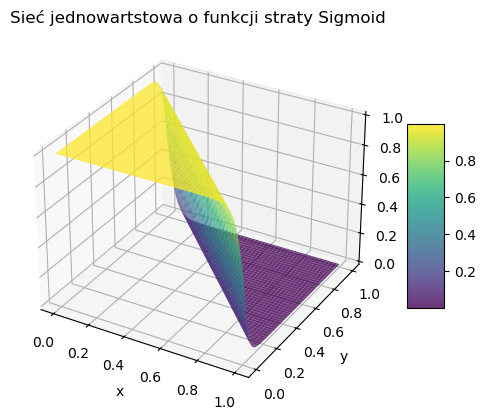

In [71]:
plot_decision_boundary_3d(one_layer_sigmoid, "Sieć jednowartstowa o funkcji straty Sigmoid")

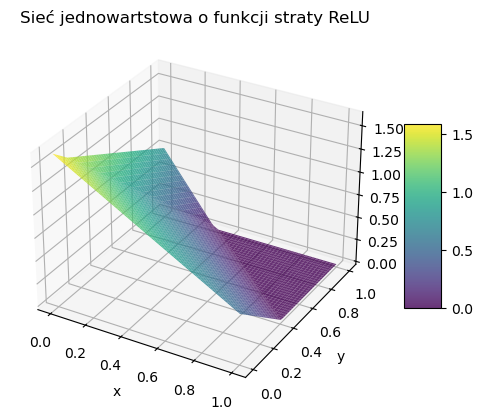

In [72]:
plot_decision_boundary_3d(one_layer_relu, "Sieć jednowartstowa o funkcji straty ReLU")

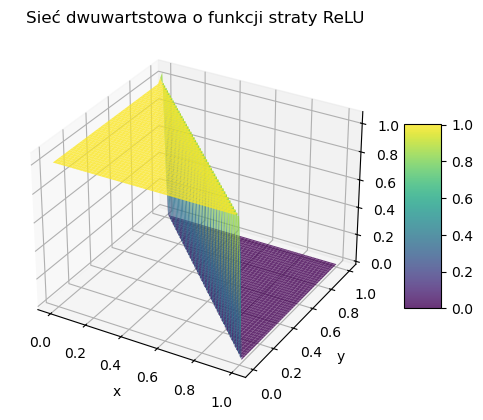

In [73]:
plot_decision_boundary_3d(two_layer_relu, "Sieć dwuwartstowa o funkcji straty ReLU")

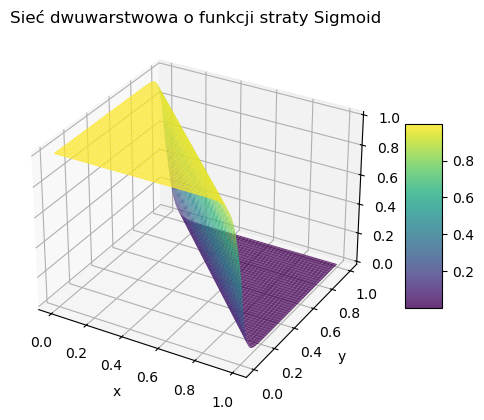

In [74]:
plot_decision_boundary_3d(two_layer_sigmoid, "Sieć dwuwarstwowa o funkcji straty Sigmoid")

Zdefiniujmy ostatni model. Model tak duży, pozwalający nam na zejście z błędem poniżej $10^{-3}$.

In [75]:
final_model = nn.Sequential(
        nn.Linear(2, 3),  # 2*2 + 2 bias = 6 parametrów
        nn.ReLU(),
        nn.Linear(3, 3),  # 2*1 + 1 bias = 3 parametrów
        nn.ReLU(),
        nn.Linear(3, 1),  # 1*1 + 1 bias = 2 parametrów
        nn.Sigmoid())

final_model.to(device)
criterion = nn.MSELoss()
optimizer_final_model = optim.Adam(final_model.parameters(), lr=0.01)

print("Trening największego modelu:")
train_model(final_model, optimizer_final_model, criterion, X_train, y_train, epochs=20000, info = 1000)
print("Wynik na zbiorze testowym")
evaluate_model(final_model, criterion, X_test, y_test)

Trening największego modelu:
Epoch 0: loss = 0.2754148
Epoch 1000: loss = 0.0036244
Epoch 2000: loss = 0.0009659
Epoch 3000: loss = 0.0002975
Epoch 4000: loss = 0.0001323
Epoch 5000: loss = 0.0000662
Epoch 6000: loss = 0.0000351
Epoch 7000: loss = 0.0000194
Epoch 8000: loss = 0.0000110
Epoch 9000: loss = 0.0000063
Epoch 10000: loss = 0.0000037
Epoch 11000: loss = 0.0000022
Epoch 12000: loss = 0.0000013
Epoch 13000: loss = 0.0000008
Epoch 14000: loss = 0.0000005
Epoch 15000: loss = 0.0000003
Epoch 16000: loss = 0.0000002
Epoch 17000: loss = 0.0000001
Epoch 18000: loss = 0.0000001
Epoch 19000: loss = 0.0000000
Wynik na zbiorze testowym


0.007426603231579065

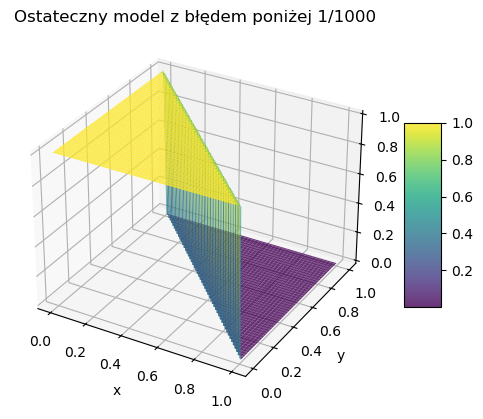

In [76]:
plot_decision_boundary_3d(final_model, "Ostateczny model z błędem poniżej 1/1000")